In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df_raw.columns = ['review', 'rating']

In [3]:
df_raw.head()

,review,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
keywords = ['good', 'great', 'excellent', 'love', 'FAVORITE', 'HAPPY', 'amazed', 'loved', 'pleased', 'easy', 'satisfied', 'comfortable']

# Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    
for key in keywords:
    
    df_raw[str(key)] = df_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [10]:
df_raw['allcaps'] = df_raw.review.str.isupper()

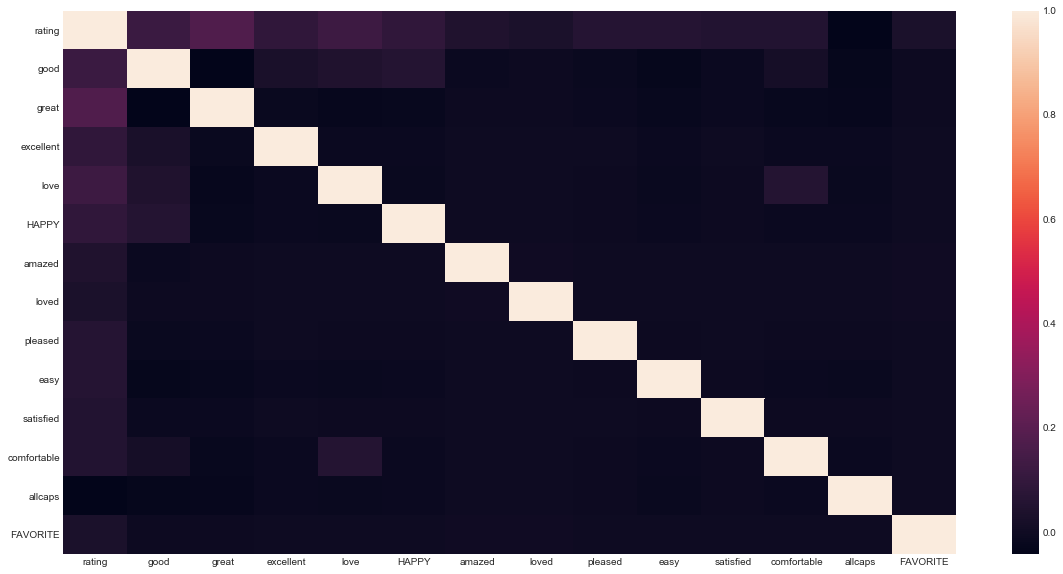

In [11]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style('white')
sns.heatmap(df_raw.corr());

In [12]:
data = df_raw[keywords + ['allcaps']]
target = df_raw['rating']

In [13]:
# Bernoulli classifier for binary/boolean data

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable

bnb = BernoulliNB()

# Fit & classify our model to the data, storing the result in a new variable

y_pred = bnb.fit(data, target).predict(data)

# Display results

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 391


In [14]:
# Test model with different holdout groups

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6
Testing on Sample: 0.609


**The model doesn't seem to overfit.  Adding keywords didn't improve accuracy much, although removing keywords led to lower accuracy.  Capitalizing keywords had no effect on predictions.  Prevalence of the keyword was most impactful to the model.**

In [15]:
# Bernoulli NB model accuracy

609/1000 *100

60.9

In [16]:
# cross validating with multiple holdout groups

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([ 0.61,  0.59,  0.63,  0.58,  0.62,  0.61,  0.64,  0.58,  0.62,  0.59])

In [17]:
print(data.shape)
f = len(data)
g = round(.20 * f)
h = round(.80 * f)
print(g)
print(h)
training_data = data[:h] 
training_target = target[:h]
testing_data = data[:-g]
testing_target = target[:-g]

y_pred_new = bnb.fit(training_data, training_target).predict(testing_data)

# Calculate the accuracy of your model here.

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (testing_target != y_pred_new).sum()
))

(1000, 13)
200
800
Number of mislabeled points out of a total 1000 points : 315
